In [64]:
from himalaya.ridge import Ridge, RidgeCV
import numpy as np
from compare_variance_residual.fmri.features import load_feature, get_pretty_feature_name
from himalaya.scoring import r2_score, correlation_score
import os
import pandas as pd

In [65]:
ridge_model = RidgeCV(alphas=np.logspace(-5, 15, 21), cv=5, solver_params=dict(n_alphas_batch=1))
ols_model = Ridge(alpha=1)

In [66]:
low_level_feature = 'phonemes'

In [67]:
semantic, _ = load_feature("../../data", "english1000")
low_level, n_samples_train = load_feature("../../data", low_level_feature)

In [68]:
ridge_model.fit(low_level[:n_samples_train], semantic[:n_samples_train]), ols_model.fit(low_level[:n_samples_train], semantic[:n_samples_train])
low_level_ridge_prediction, low_level_ols_prediction = ridge_model.predict(low_level[n_samples_train:]), ols_model.predict(low_level[n_samples_train:])

In [69]:
# save the predictions
def save_predictions(prediction, name):
    path = os.path.join("results", "predictions")
    os.makedirs(path, exist_ok=True)
    prediction_path = os.path.join(path, f"{name}_predictions.csv")
    if not os.path.exists(prediction_path):
        prediction_df = pd.DataFrame(prediction)
        prediction_df.to_csv(prediction_path, index=False)
save_predictions(low_level_ols_prediction, f"{low_level_feature}_ols")
save_predictions(low_level_ridge_prediction, f"{low_level_feature}_ridge")

In [70]:
# load the predictions
def load_predictions(name):
    path = os.path.join("results", "predictions")
    prediction_path = os.path.join(path, f"{name}_predictions.csv")
    if os.path.exists(prediction_path):
        prediction_df = pd.read_csv(prediction_path)
        return prediction_df.to_numpy()
    else:
        raise FileNotFoundError(f"{prediction_path} not found")
low_level_ols_prediction = load_predictions(f"{low_level_feature}_ols")
low_level_ridge_prediction = load_predictions(f"{low_level_feature}_ridge")

In [71]:
low_level_ols_corr = correlation_score(low_level_ols_prediction, semantic[n_samples_train:])
low_level_ridge_corr = correlation_score(low_level_ridge_prediction, semantic[n_samples_train:])

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import simplstyles

In [73]:
plt.style.use('nord-light-talk')

Text(1, 0.6046902932702095, '0.60')

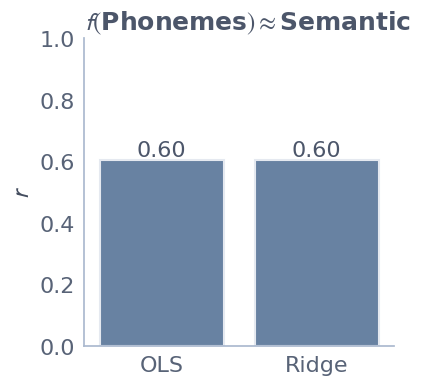

In [74]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x=["OLS", "Ridge"], y=[low_level_ols_corr.mean(), low_level_ridge_corr.mean()])
plt.title(fr"$f(${get_pretty_feature_name(low_level_feature)}$)\approx$Semantic")
plt.ylim(0,1)
plt.ylabel(r"$r$")
# write the mean of the correlation
plt.text(0, low_level_ols_corr.mean(), f"{low_level_ols_corr.mean():.2f}", ha='center', va='bottom')
plt.text(1, low_level_ridge_corr.mean(), f"{low_level_ridge_corr.mean():.2f}", ha='center', va='bottom')

$R^2$ scores

In [75]:
low_level_ols_r2 = r2_score(low_level_ols_prediction, semantic[n_samples_train:])
low_level_ridge_r2 = r2_score(low_level_ridge_prediction, semantic[n_samples_train:])

Text(1, -1.8939990411941965, '-1.89')

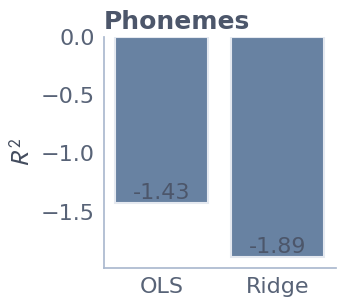

In [76]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(x=["OLS", "Ridge"], y=[low_level_ols_r2.mean(), low_level_ridge_r2.mean()])
plt.title(get_pretty_feature_name(low_level_feature))
# plt.ylim(0,1)
plt.ylabel(r"$R^2$")
# write the mean of the correlation
plt.text(0, low_level_ols_r2.mean(), f"{low_level_ols_r2.mean():.2f}", ha='center', va='bottom')
plt.text(1, low_level_ridge_r2.mean(), f"{low_level_ridge_r2.mean():.2f}", ha='center', va='bottom')